# Supervised Learning Regression Project: Cars4U

## Problem Statement

### Business Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below. 

**Data Dictionary** 

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Importing necessary libraries

In [22]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [23]:
# Reading the dataset
data = pd.read_csv("/content/used_cars_data.csv")

In [24]:
# Finding the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [25]:
# Viewing the top 5 rows within the data
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [26]:
# Viewing the last 5 rows within the data
data.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,86.97,NaN


In [27]:
# Checking the data types of each column in the data set
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


Mileage, Engine, Power, Seats, and Price have missing values.

## Data Overview

- Observations
- Sanity checks

In [28]:
# Creating a copy of the dataset
cdata = data.copy()

In [29]:
# Checking for any duplicates within the data
cdata.duplicated().sum()

0

There are no  duplicated records within the data.

In [30]:
# Looking at columns names in the data
print(cdata.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


In [31]:
# Counting number of missing values
cdata.isna().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [32]:
# Statistical summary of the data
cdata.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.00,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


In [33]:
# Identifiying non-numeric columns
nonNumeric_Columns = cdata.select_dtypes(exclude=np.number).columns
nonNumeric_Columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')

In [34]:
# Unique values in the name column
cdata["Name"].nunique()

2041

There are 2041 unique vehicles within the data. 

In [35]:
# Splitting name into two columns brand and vehicle model
cdata['Brand'] = cdata['Name'].apply(lambda x: x.split(" ")[0].lower())
cdata['Model'] = cdata['Name'].apply(lambda x: x.split(" ")[1].lower())
# Checking to see if the name got split.
cdata.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,maruti,wagon
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,hyundai,creta
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,honda,jazz
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,maruti,ertiga
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,audi,a4


In [36]:
# Unique values in the brand 
cdata['Brand'].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

Maruti is the most common car brand within the data set. 

In [37]:
# looking at each unique value within the models column
cdata['Model'].value_counts()

swift      418
city       318
i20        303
innova     203
verna      200
          ... 
fortwo       1
redi         1
e            1
mustang      1
1.4gsi       1
Name: Model, Length: 218, dtype: int64

The swift vehicle model is the most common vehicle in the dataset.

In [17]:
# I have noticed that 3 columns are redundant, namely mileage, engine and power. I will therefore, drop these columns
cdata.drop(columns=['Mileage', 'Engine', 'Power'], inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the pricing of used cars distributed?
2. What is the market share of different brands in the used car market?
3. What is the market share of different types of fuels in the used car market?
4. How does the prices of used cars vary by car brand?
5. How does the prices of used cars vary by location?
6. What are the attributes that have a strong correlation with the price of used cars? 



In [38]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [39]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

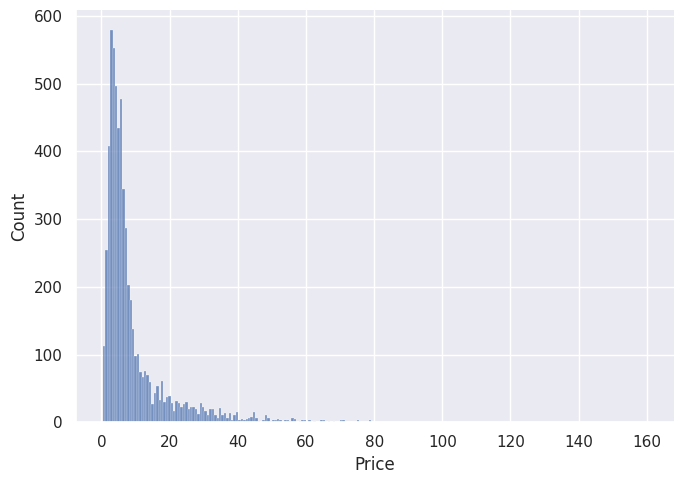

In [40]:
# Distribution of price
sns.displot(
  data=cdata,
  x="Price",
  kind="hist",
  aspect=1.4
)

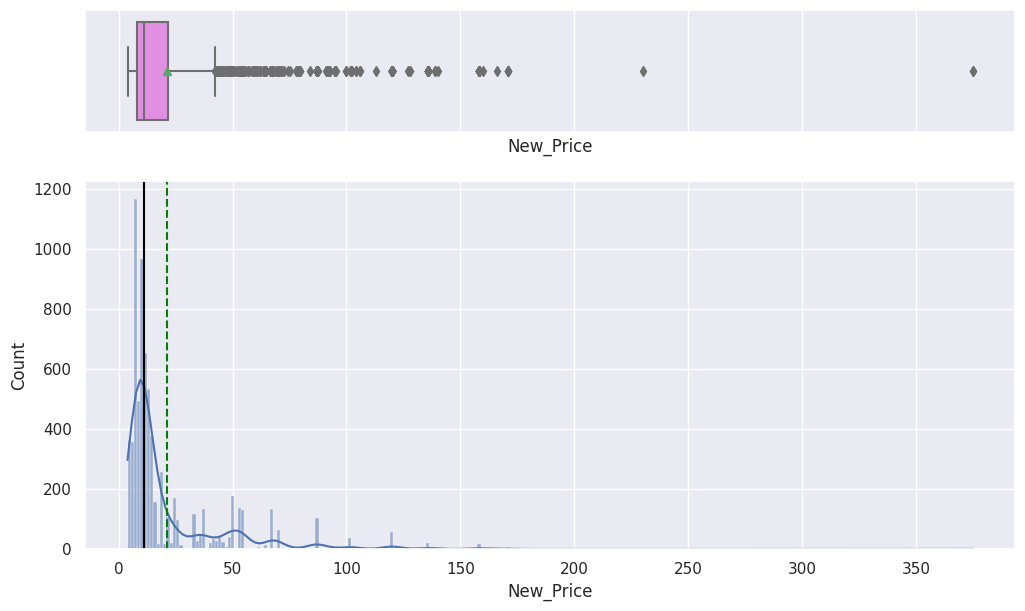

In [41]:
# New Price column
histogram_boxplot(cdata, 'New_Price', kde = True)

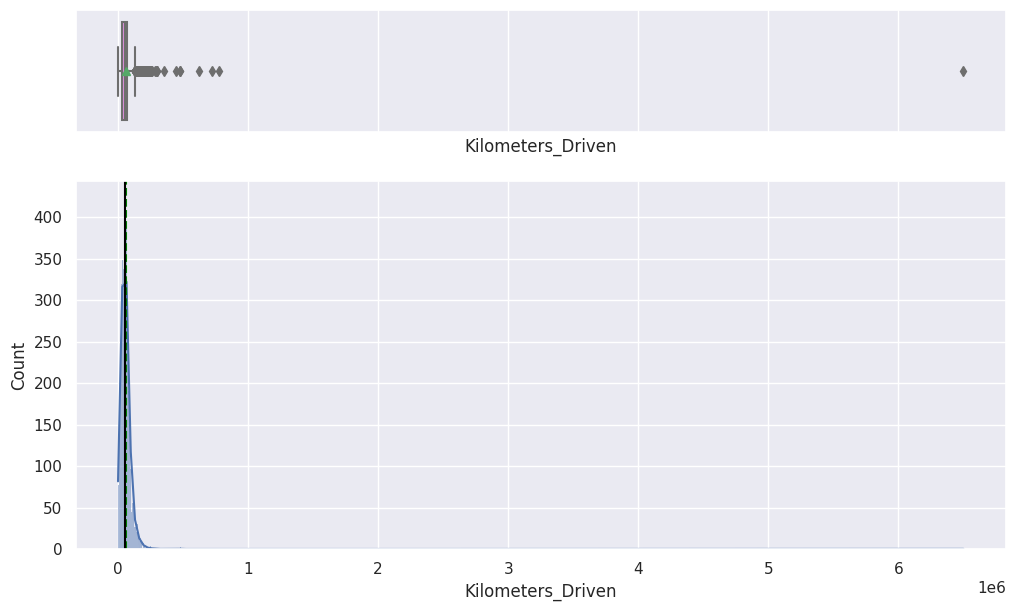

In [42]:
# Kilometers driven
histogram_boxplot(cdata, 'Kilometers_Driven', kde = True)

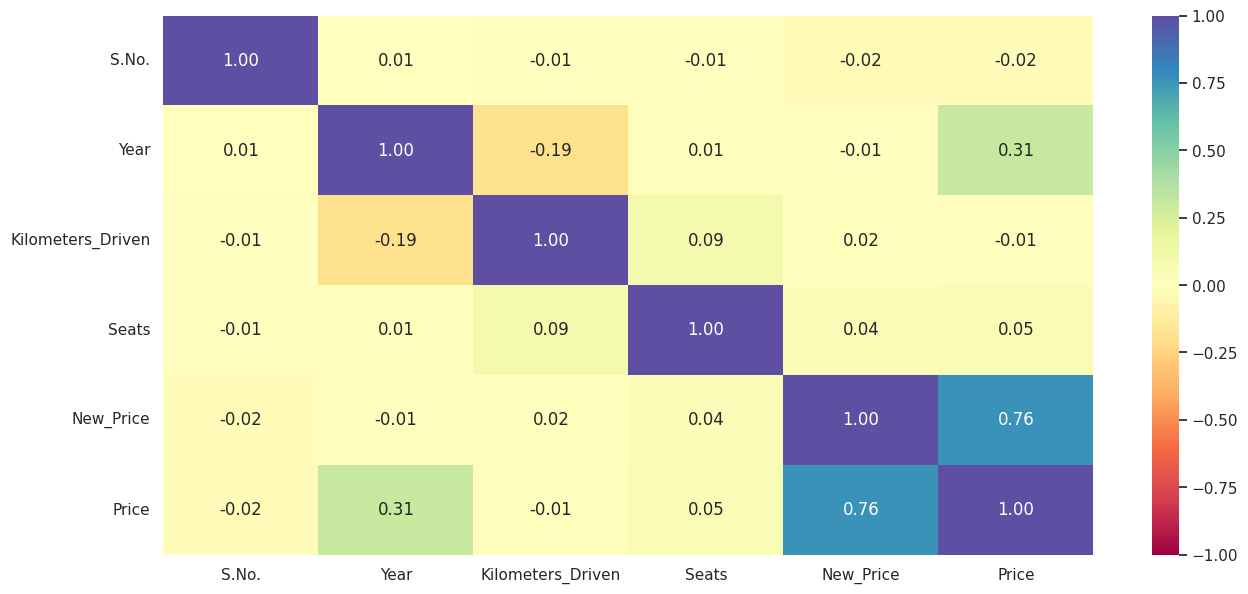

In [43]:
# Heatmap used to identify correlations between variables
cols_list = cdata.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(
    cdata[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

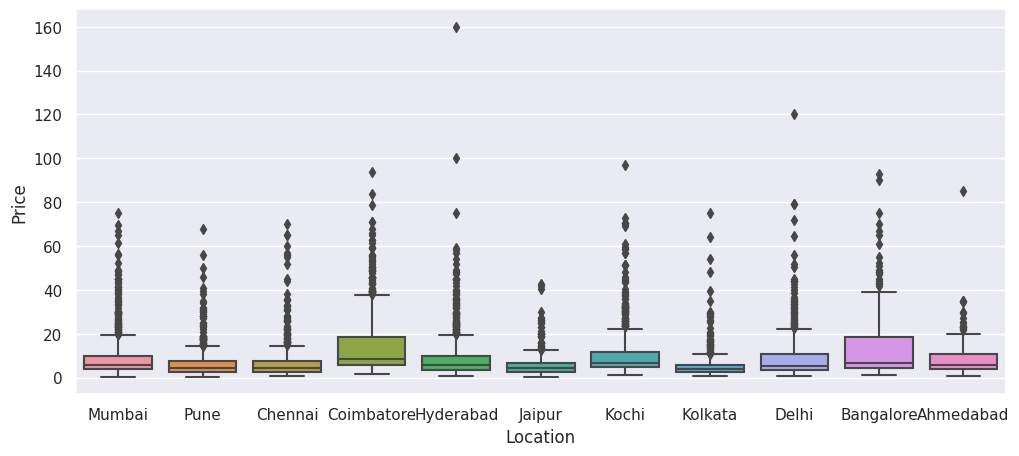

In [44]:
# Correlation between price and location
plt.figure(figsize=(12, 5))
sns.boxplot(x='Location', y='Price', data = cdata)
plt.show()

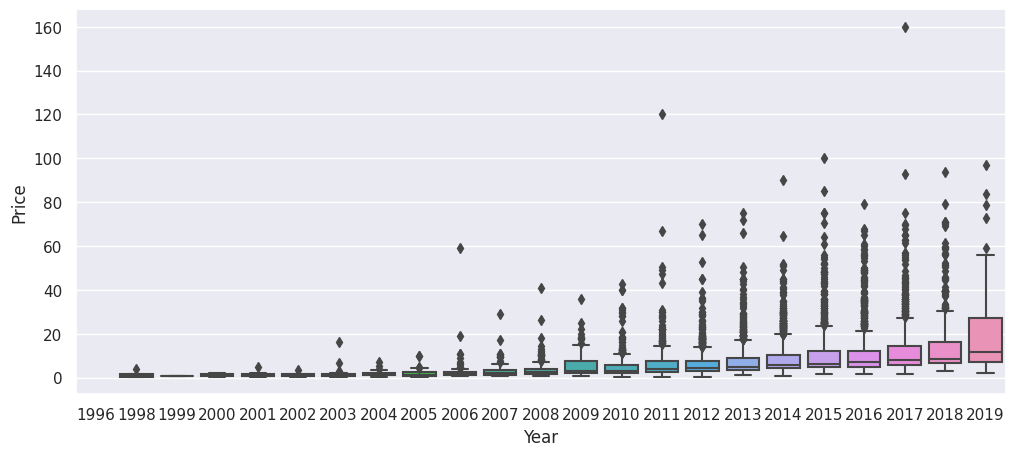

In [45]:
# Correlation between price and vehicle year 
plt.figure(figsize=(12, 5))
sns.boxplot(x='Year', y='Price', data = cdata)
plt.show()

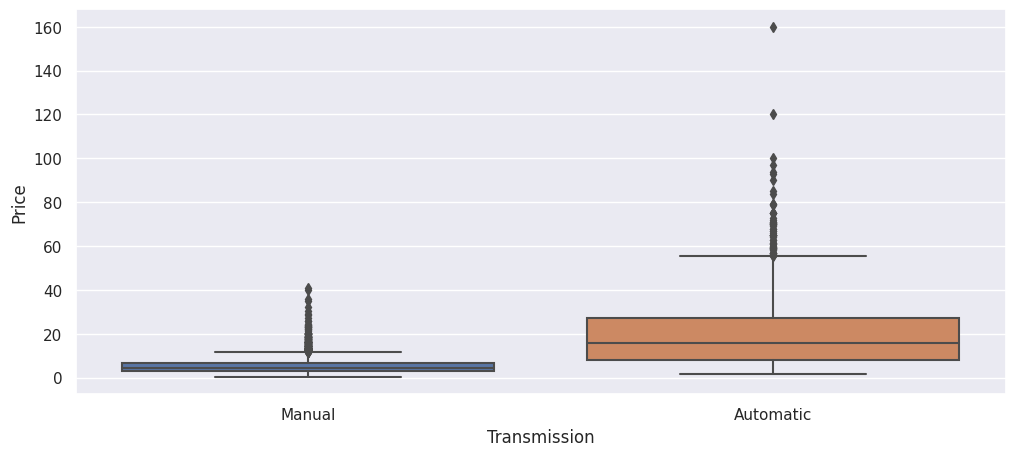

In [46]:
# Noticing the correlation between vehicle price and it's tranmission
plt.figure(figsize=(12, 5))
sns.boxplot(x='Transmission', y='Price', data = cdata)
plt.show()

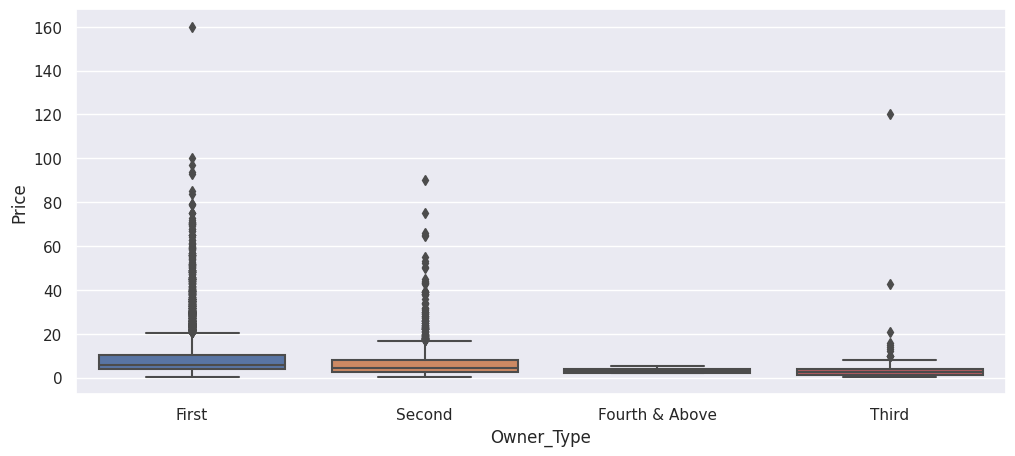

In [47]:
# Identifying the correlation between ownership and price
plt.figure(figsize=(12, 5))
sns.boxplot(x='Owner_Type', y='Price', data = cdata)
plt.show()

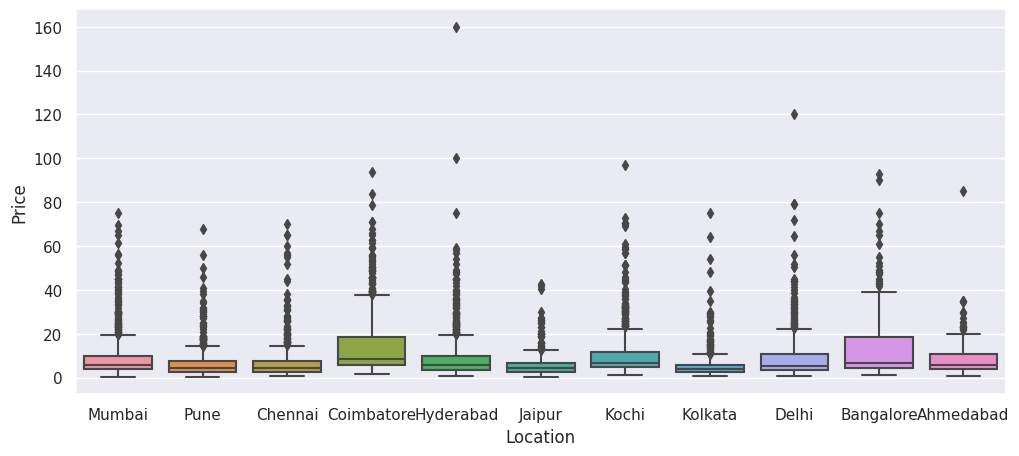

In [48]:
# Correlation between price and vehicle fuel types
plt.figure(figsize=(12, 5))
sns.boxplot(x='Location', y='Price', data = cdata)
plt.show()

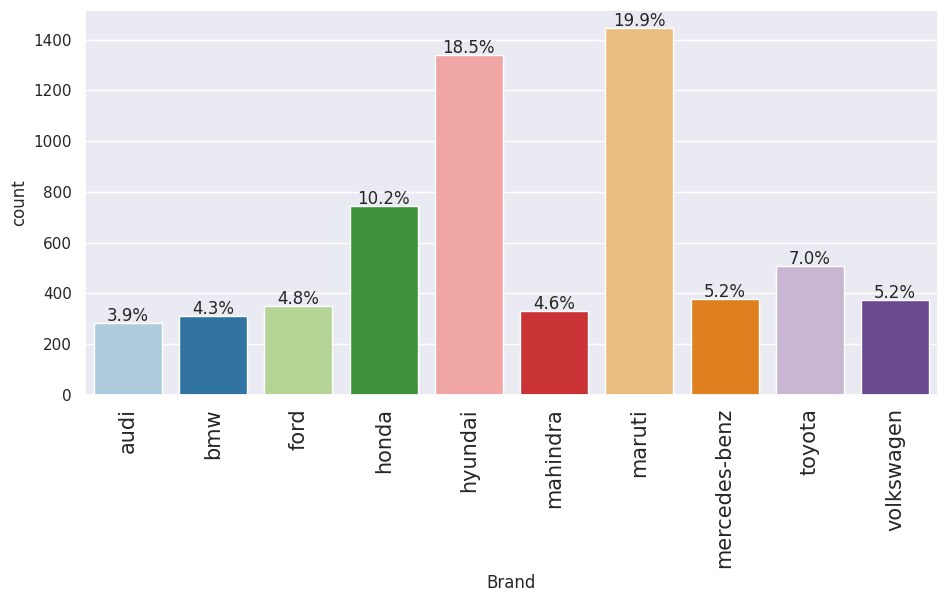

In [49]:
# Barplot showing the range of different vehicle brands within the data set
labeled_barplot(cdata, 'Brand', perc=True, n=10)

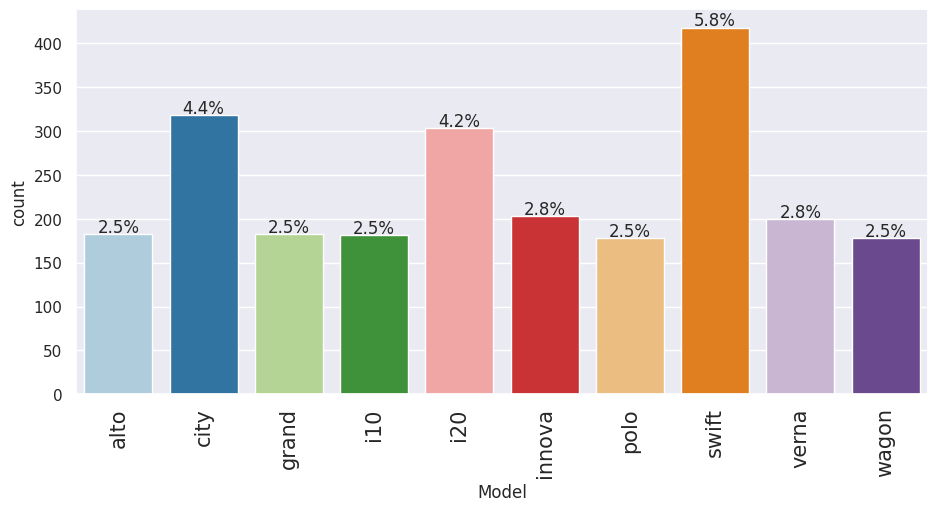

In [50]:
# barplot for each vehicle model in the data set
labeled_barplot(cdata, 'Model', perc=True, n=10)

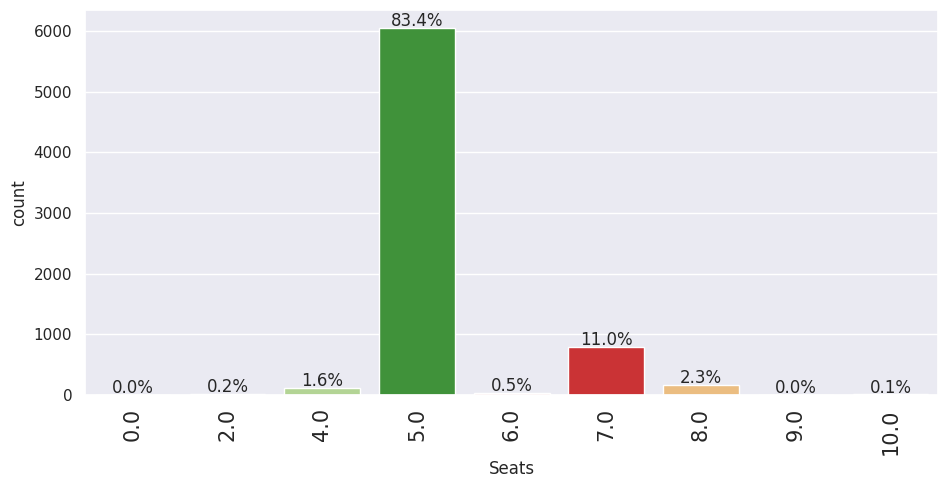

In [51]:
# Barplot for the spread of seats within a vehicle
labeled_barplot(cdata, 'Seats', perc=True, n=10)

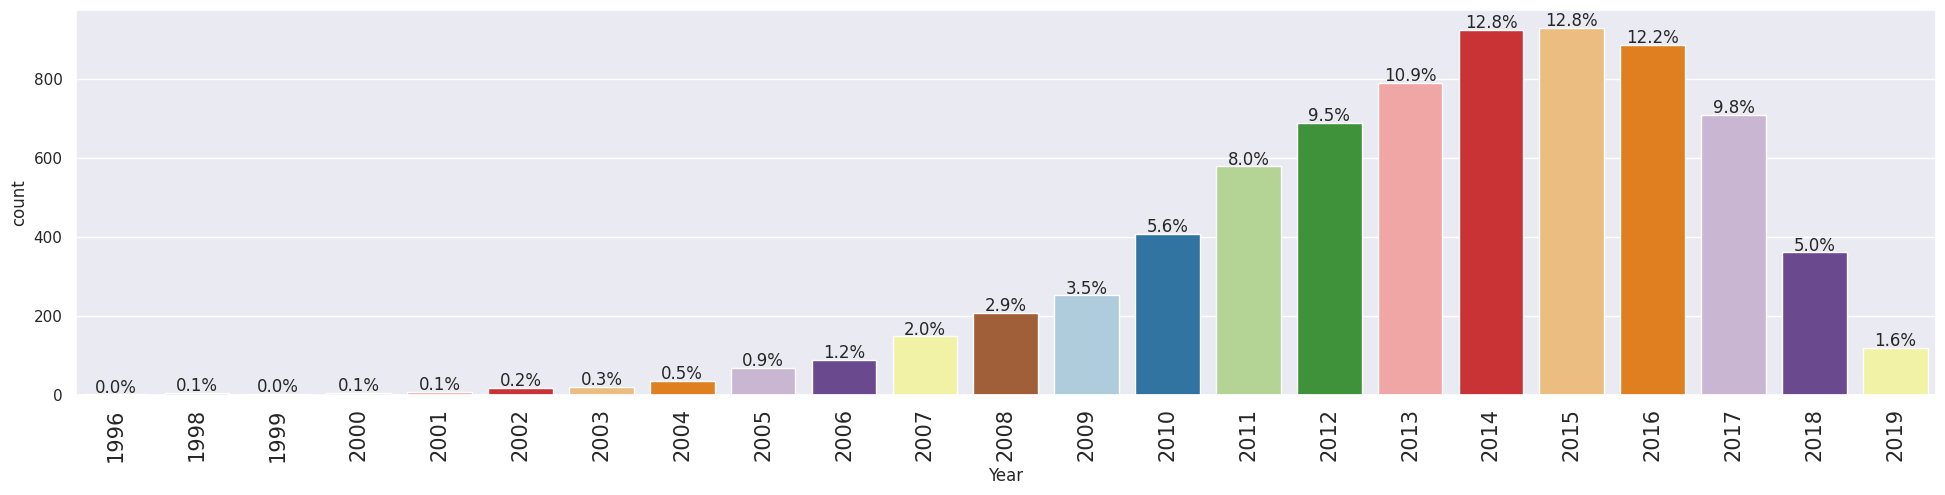

In [52]:
# Spread of vehicles across each year
labeled_barplot(cdata, 'Year', perc=True)

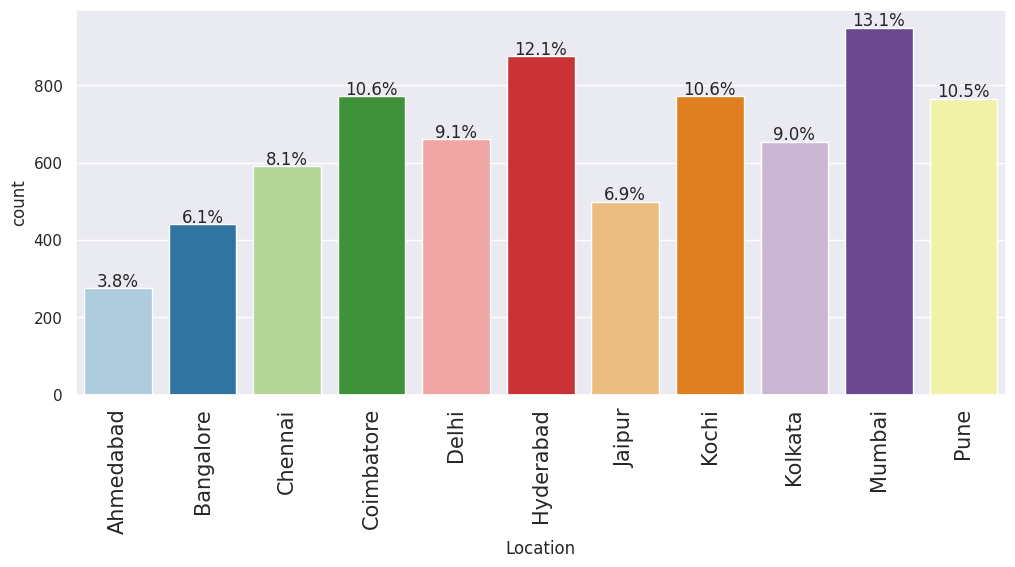

In [53]:
# Vehicle spread across various locations
labeled_barplot(cdata, 'Location', perc=True)

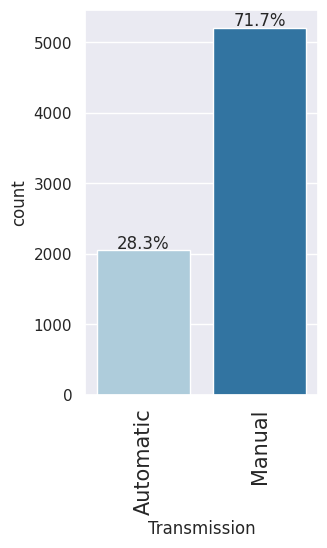

In [54]:
# Vehicles according to transmission type
labeled_barplot(cdata, 'Transmission', perc=True)

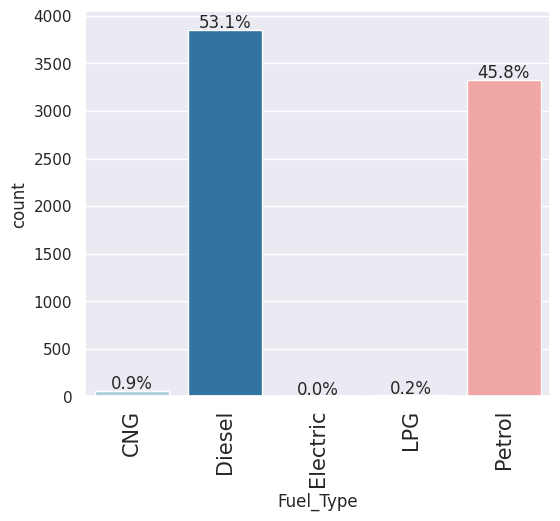

In [55]:
# Vehicles according to Fuel type
labeled_barplot(cdata, 'Fuel_Type', perc=True)

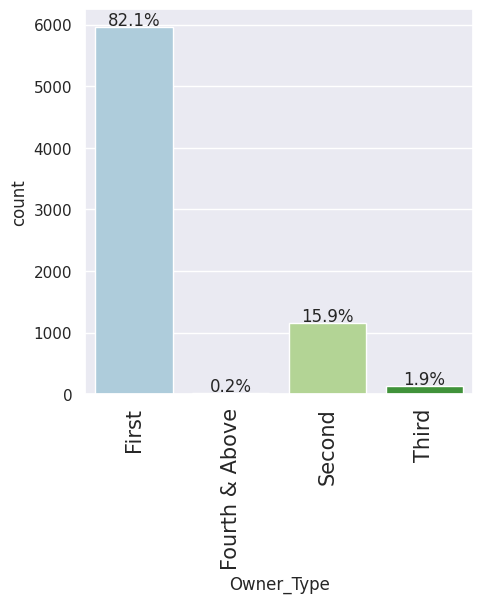

In [56]:
# Vehicles according to ownership
labeled_barplot(cdata, 'Owner_Type', perc=True)

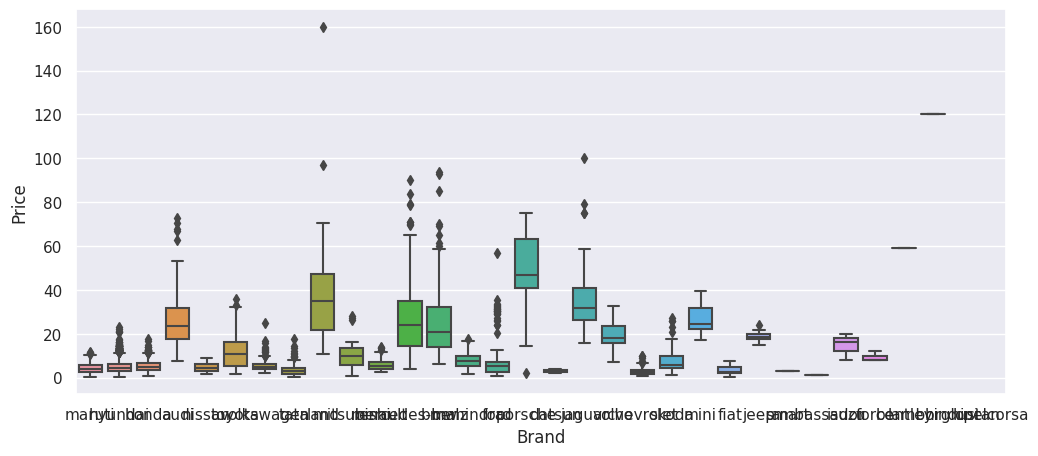

In [57]:
# Correlation between price and brand
plt.figure(figsize=(12, 5))
sns.boxplot(x='Brand', y='Price', data = cdata)
plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [58]:
# Missing value treatment 
cdata.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
Brand                   0
Model                   0
dtype: int64

In [59]:
cdata[cdata['Seats'].isnull()]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
194,194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.580,2.95,honda,city
208,208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,2.11,maruti,swift
229,229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0 kmpl,1498 CC,99 bhp,NaN,7.650,3.60,ford,figo
733,733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,7.880,1.75,maruti,swift
749,749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,120.000,26.50,land,rover
1294,1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,13.580,3.20,honda,city
1327,1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.880,5.80,maruti,swift
1385,1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,13.580,1.50,honda,city
1460,1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,120.000,40.88,land,rover
1917,1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.0 kmpl,1493 CC,100 bhp,NaN,13.580,1.70,honda,city


In [60]:
# As seats contains a numeric value we can impute the missing values using the median
# Grouping the vehicle by brand and model
cdata.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

,Brand,Model,Seats
0,ambassador,classic,5.0
1,audi,a3,5.0
2,audi,a4,5.0
3,audi,a6,5.0
4,audi,a7,5.0
...,...,...,...
217,volvo,s60,5.0
218,volvo,s80,5.0
219,volvo,v40,5.0
220,volvo,xc60,5.0


In [61]:
# Imputing the missing values for seats based on the brand and model
cdata['Seats'] = cdata.groupby(['Brand', 'Model'])['Seats'].transform(lambda x: x.fillna(x.median()))

In [62]:
# Method used to convert string values to type float64.
def mileage_object_to_float(Mileage):
  if isinstance(Mileage, str): 
    multiplier = 1
    if Mileage.endswith('kmpl'):
      multiplier = 1
      return float(Mileage.replace('kmpl',''))
    if Mileage.endswith('km/kg'):
      multiplier = 1
      return float(Mileage.replace('km/kg','')) * multiplier
  else:
    return  np.nan

def Engine_object_to_float(Engine):
  if isinstance(Engine, str): 
    multiplier = 1
    if Engine.endswith('CC'):
      multiplier = 1
      return float(Engine.replace('CC',''))*multiplier
  else:
    return  np.nan

def power_object_to_float(Power):
  if isinstance(Power, str): 
    multiplier = 1
    if Power.endswith('bhp'):
      multiplier = 1
      return float(Power.replace('bhp',''))*multiplier
  else:
    return  np.nan

cardata=['Mileage', 'Engine', 'Power']
df = cdata
# Removing string in object data type
for colname in cardata:
  if colname == 'Mileage':
    cdata[colname] = cdata['Mileage'].apply(mileage_object_to_float)
  elif colname == 'Engine':
    cdata[colname] = cdata['Engine'].apply(Engine_object_to_float)   
  elif colname == 'Power':
    cdata[colname] = cdata['Power'].apply(power_object_to_float)

# Viewing changes
cdata[cardata].head()

,Mileage,Engine,Power
0,26.60,998.0,58.16
1,19.67,1582.0,126.20
2,18.20,1199.0,88.70
3,20.77,1248.0,88.76
4,15.20,1968.0,140.80


In [63]:
# Impute values missing for mileage, engine and power
cdata['Mileage'] = cdata.groupby(['Brand', 'Model'])['Mileage'].transform(lambda x: x.fillna(x.median()))
cdata['Engine'] = cdata.groupby(['Brand', 'Model'])['Engine'].transform(lambda x: x.fillna(x.median()))
cdata['Power'] = cdata.groupby(['Brand', 'Model'])['Power'].transform(lambda x: x.fillna(x.median()))

Creating log transformed columns for numerical columns to allow the data to be as close to a normal distribution as possible.

In [64]:
# Price
cdata['log_price'] = np.log(cdata['Price'])

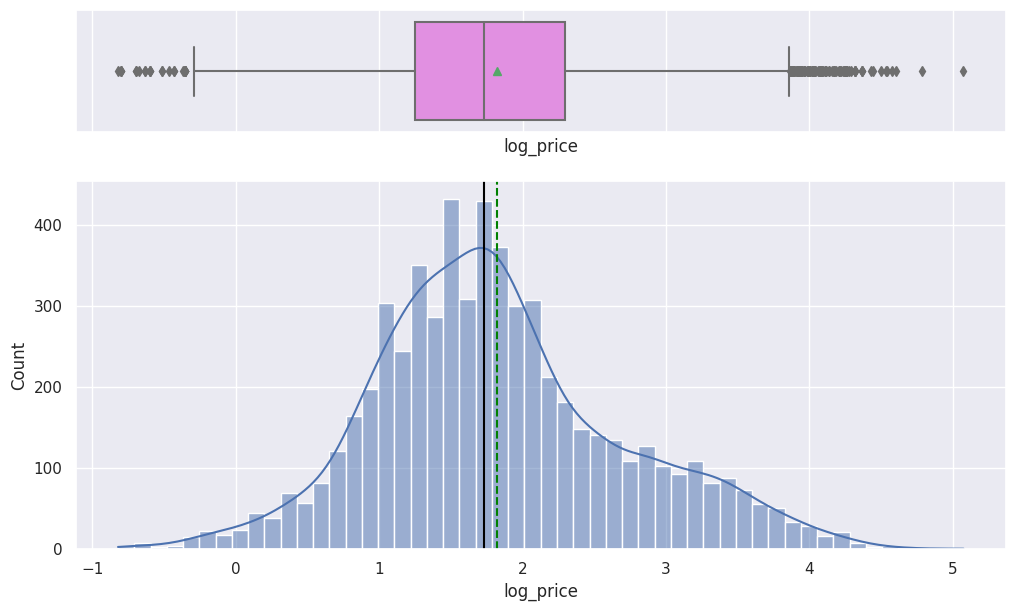

In [65]:
# Diagram of log_price column
histogram_boxplot(cdata, 'log_price', kde=True)

In [66]:
# New Price
cdata['log_new_price'] = np.log(cdata['New_Price'])

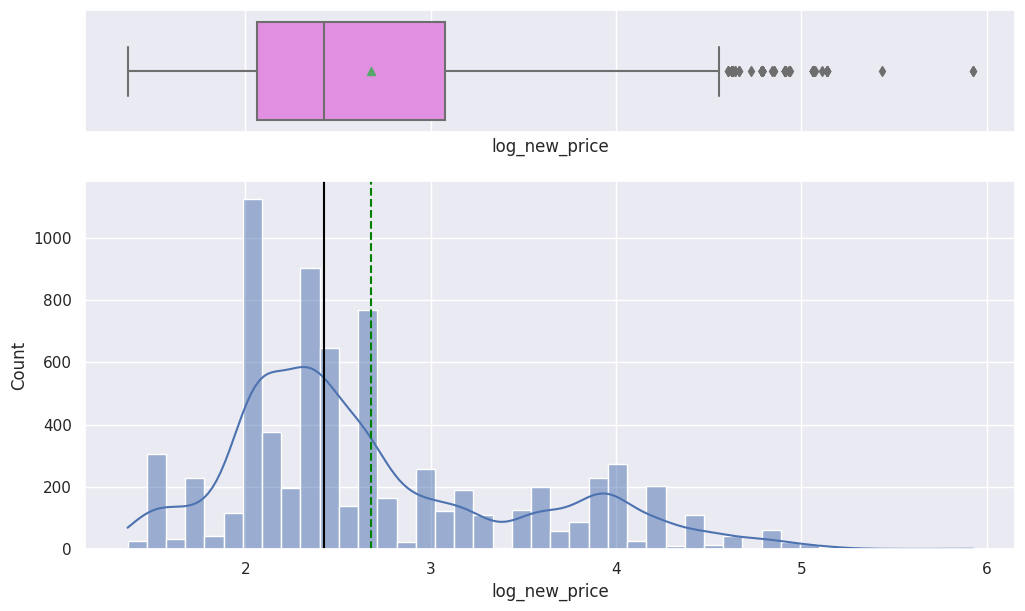

In [67]:
# New Price log
histogram_boxplot(cdata, 'log_new_price', kde = True)

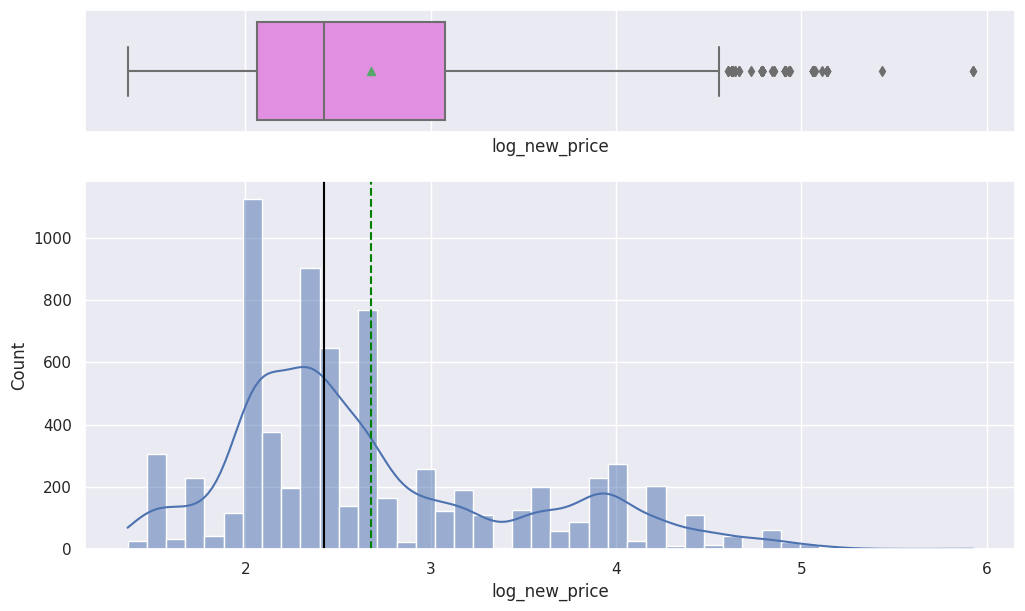

In [68]:
# log_new_price visual representation
histogram_boxplot(cdata, 'log_new_price', kde=True)

In [69]:
# Kilometers
cdata['km_driven_log'] = np.log(cdata['Kilometers_Driven'])

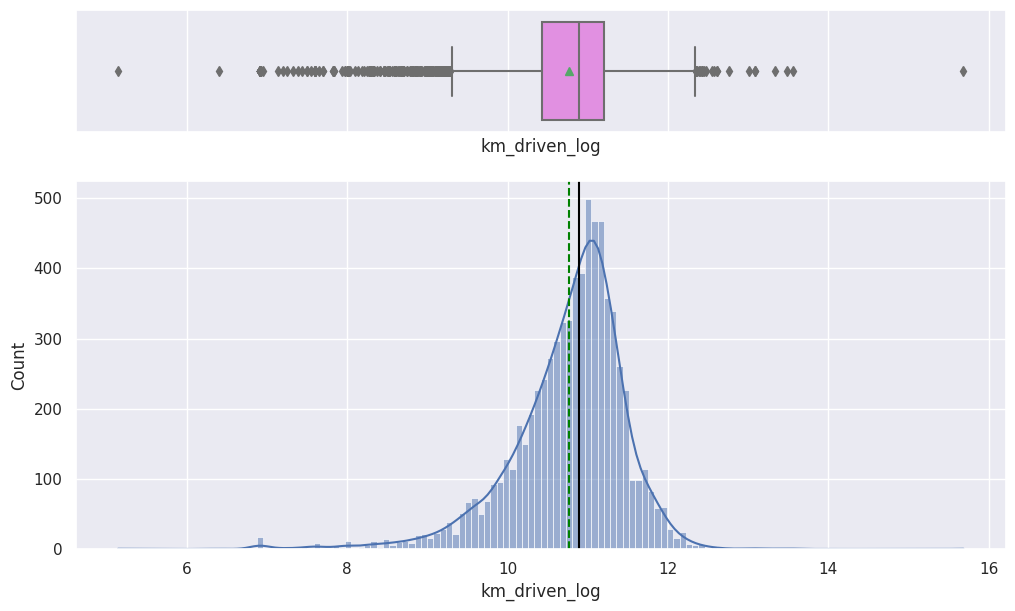

In [71]:
# Log chart for Kilometers driven
histogram_boxplot(cdata, 'km_driven_log', kde=True)

In [72]:
cdata.drop(columns=["Kilometers_Driven"], inplace=True)

In [73]:
# Drop missing rows of price
cdata.dropna(subset=['Price'], inplace = True)

In [74]:
# Dropping missing rows of Mileage and Power
cdata.dropna(subset=['Mileage'], inplace = True)
cdata.dropna(subset=['Power'], inplace = True)

In [76]:
# Checking null columns
cdata.isnull().sum()

S.No.            0
Name             0
Location         0
Year             0
Fuel_Type        0
Transmission     0
Owner_Type       0
Mileage          0
Engine           0
Power            0
Seats            0
New_Price        0
Price            0
Brand            0
Model            0
log_price        0
log_new_price    0
km_driven_log    0
dtype: int64

There are no more missing values

## Model Building - Linear Regression

Dependent variable: Price

In [77]:
# Defining dependent and independent variable
x = cdata.drop(['Price', 'log_price'], axis = 1)
y = cdata['Price'] 

In [78]:
# Creating dummy variables
x = pd.get_dummies(x, columns = x.select_dtypes(include=['object', 'category']).columns.tolist(),
                           drop_first = True)
x.head()

S.No.  Year  Mileage  Engine   Power  Seats  New_Price  log_new_price  \
0      0  2010    26.60   998.0   58.16    5.0       5.51       1.706565   
1      1  2015    19.67  1582.0  126.20    5.0      16.06       2.776332   
2      2  2011    18.20  1199.0   88.70    5.0       8.61       2.152924   
3      3  2012    20.77  1248.0   88.76    7.0      11.27       2.422144   
4      4  2013    15.20  1968.0  140.80    5.0      53.14       3.972930   

   km_driven_log  Name_Audi A3 35 TDI Attraction  Name_Audi A3 35 TDI Premium  \
0      11.184421                               0                            0   
1      10.621327                               0                            0   
2      10.736397                               0                            0   
3      11.373663                               0                            0   
4      10.613246                               0                            0   

   Name_Audi A3 35 TDI Premium Plus  Name_Audi A3 35 TDI Technology  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Name_Audi A4 1.8 TFSI  Name_Audi A4 1.8 TFSI Technology Edition  \
0                      0                                         0   
1                      0                                         0   
2                      0                                         0   
3                      0                                         0   
4                      0                                         0   

   Name_Audi A4 2.0 TDI  Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                     0                                          0   
1                     0                                          0   
2                     0                                          0   
3                     0                                          0   
4                     0                                          0   

   Name_Audi A4 2.0 TDI 177 Bhp Technology Edition  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Name_Audi A4 2.0 TDI Celebration Edition  Name_Audi A4 2.0 TDI Multitronic  \
0                                         0                                 0   
1                                         0                                 0   
2                                         0                                 0   
3                                         0                                 0   
4                                         0                                 0   

   Name_Audi A4 2.0 TDI Premium Sport Limited Edition  Name_Audi A4 2.0 TFSI  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                       0   

   Name_Audi A4 3.0 TDI Quattro  Name_Audi A4 3.0 TDI Quattro Premium  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   Name_Audi A4 3.2 FSI Tiptronic Quattro  Name_Audi A4 30

In [79]:
# Looking at the new shape of dataset
x.shape

(6006, 2119)

In [80]:
# Splitting the data in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [81]:
# Viewing the number of rows and columns in the data
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4204
Number of rows in test data = 1802


In [82]:
# Fitting a linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

## Model Performance Check

In [83]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [84]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.896672,0.974761,0.971105,0.941724,16.653402


In [85]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.074368e+08,1.025697e+07,-9.151635e+13,5.183049e+14,1.801058e+08


## Model Performance Comparison

Observations

The train and test R2 are 0.98 and -2.25, indicating that the model is able to explain 98% and -2.25% of the total variation in the train and test sets respectively. However, both scores are not comparable.

RMSE values on the train and test sets are not comparable.

This idicates that the model is overfitting which could be as a result of the range and outliers.

MAE indicates that our current model is able to predict pricing within a mean error of 5424.35.

However, the overall performance is not good.

## Actionable Insights and Recommendations 

- The model I have been able to create can be used to predict the price of used cars with an accuracy of 98% in the training data set.

- During analysis of this data set, I have noticed that more expensive cars may have altered the accuracy of the model as majority of vehicles within the data set are common cars usually bought and driven by middle income households. 


___